In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Get the current notebook's directory
notebook_dir = Path().absolute()

# Set the working directory to the notebook's directory
os.chdir(notebook_dir)

from constants import Cryptos, CCMIX
from crypto_attack import CryptoAttack

In [2]:
CCMIX.load_data()
for crypto in Cryptos:
    crypto.value.load_data()
    crypto.value.add_market_returns(CCMIX.data)

Data for CCMIX loaded successfully.
Data for Bitcoin Gold loaded successfully.
Market returns added successfully to Bitcoin Gold data.
Data for Einsteinium loaded successfully.
Market returns added successfully to Einsteinium data.
Data for Electroneum loaded successfully.
Market returns added successfully to Electroneum data.
Data for Ethereum Classic loaded successfully.
Market returns added successfully to Ethereum Classic data.
Data for Expanse loaded successfully.
Market returns added successfully to Expanse data.
Data for Firo loaded successfully.
Market returns added successfully to Firo data.
Data for Horizen loaded successfully.
Market returns added successfully to Horizen data.
Data for Karbo loaded successfully.
Market returns added successfully to Karbo data.
Data for Litecoin loaded successfully.
Market returns added successfully to Litecoin data.
Data for MonaCoin loaded successfully.
Market returns added successfully to MonaCoin data.
Data for Public Index Network loaded

In [42]:
# Testing economic models
from models import MarketModel, MarketAdjustedModel, MeanAdjustedModel
# Sample data
asset_returns = np.array([0.01, 0.02, 0.015, -0.005, 0.03])
market_returns = np.array([0.005, 0.015, 0.01, -0.002, 0.025])
peer_returns = np.array([0.008, 0.014, 0.012, -0.003, 0.027])
event_window = [1, 2, 3]  # event window covering day 1 to day 3

# Market Model Example
mm = MarketModel(asset_returns, market_returns)
print(mm.verify_assumptions())
print("CAR (Market Model):", mm.calculate_CAR(event_window))

# Market-Adjusted Model Example
mam = MarketAdjustedModel(asset_returns, market_returns)
print(mam.verify_assumptions())
print("CAR (Market-Adjusted Model):", mam.calculate_CAR(event_window))

# Mean Adjusted Model Example
mam = MeanAdjustedModel(asset_returns, peer_returns)
print(mam.verify_assumptions())
print("CAR (Mean Adjusted Model):", mam.calculate_CAR(event_window))


# Data Preparation

In [3]:
#Compare the size of the cryptocurrencies
Mean_marketCaps={crypto.value.name:crypto.value.data['marketCap'].mean() for crypto in Cryptos}
sorted(Mean_marketCaps.items())

[('Bitcoin Gold', np.float64(628641892.2980177)),
 ('Einsteinium', np.float64(27802282.76267771)),
 ('Electroneum', np.float64(138179826.85763282)),
 ('Ethereum Classic', np.float64(2083929458.09646)),
 ('Expanse', np.float64(4323692.171002012)),
 ('Firo', np.float64(81303952.7160876)),
 ('Horizen', np.float64(258413271.64463368)),
 ('Karbo', np.float64(1320485.9033087967)),
 ('Litecoin', np.float64(6689003437.689705)),
 ('MonaCoin', np.float64(120074779.6285486)),
 ('Public Index Network', np.float64(7930839.001650189)),
 ('Verge', np.float64(317292364.18328065))]

In [4]:
BTG = Cryptos.BTG.value
BTG.data

,close,volume,marketCap,Currency,log_returns,discrete_returns,market_discrete_returns,market_log_returns
time,,,,,,,,
2017-12-19 00:00:00+00:00,355.179993,4.133630e+08,5.937166e+09,Bitcoin Gold,0.105770,0.111567,-0.000727,-0.000727
2017-12-20 00:00:00+00:00,453.454987,9.831690e+08,7.580781e+09,Bitcoin Gold,0.244271,0.276691,-0.026525,-0.026883
2017-12-21 00:00:00+00:00,406.773010,3.521780e+08,6.801142e+09,Bitcoin Gold,-0.108641,-0.102947,-0.039806,-0.040620
2017-12-22 00:00:00+00:00,305.730011,3.133130e+08,5.112245e+09,Bitcoin Gold,-0.285553,-0.248401,-0.002221,-0.002223
2017-12-23 00:00:00+00:00,334.563995,2.177780e+08,5.595005e+09,Bitcoin Gold,0.090126,0.094312,0.008186,0.008153
...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00+00:00,45.646772,3.038055e+07,7.994541e+08,Bitcoin Gold,0.013589,0.013682,0.001775,0.001773
2021-12-28 00:00:00+00:00,42.107834,1.479038e+07,7.374734e+08,Bitcoin Gold,-0.080699,-0.077529,-0.005876,-0.005894
2021-12-29 00:00:00+00:00,40.727911,1.376307e+07,7.133055e+08,Bitcoin Gold,-0.033320,-0.032771,0.003253,0.003248


# Discriptive statistics

In [5]:
from scipy.stats import f
from scipy.stats import skew, shapiro
from statsmodels.graphics.gofplots import qqplot

panel_data = pd.concat([crypto.value.data for crypto in Cryptos], axis=0)

Plotted Discrete Returns.
Plotted Log Returns.


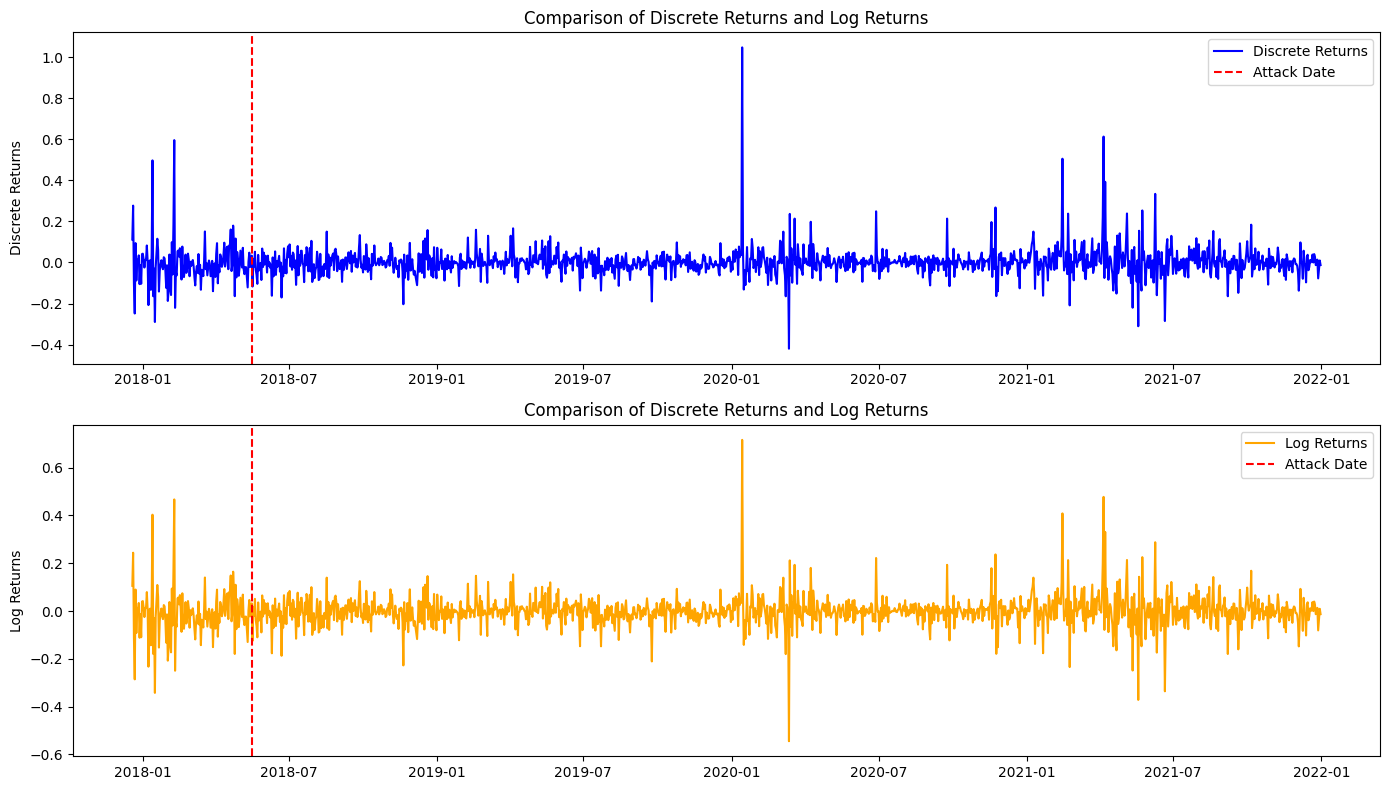

Calculated Cumulative Returns.


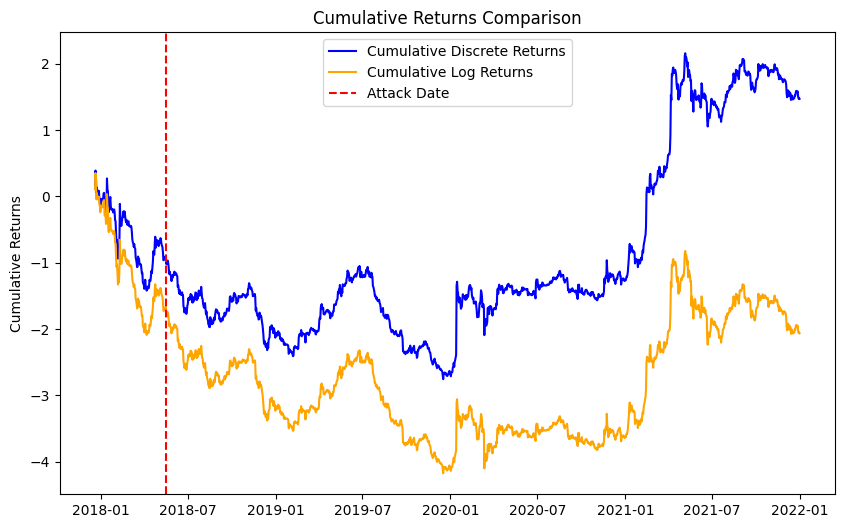

Plotted Cumulative Returns.
Descriptive Statistics:
       discrete_returns  log_returns
count       1474.000000  1474.000000
mean           0.000997    -0.001400
std            0.072443     0.068278
min           -0.419835    -0.544442
25%           -0.028700    -0.029119
50%           -0.000009    -0.000009
75%            0.025621     0.025299
max            1.046897     0.716325
Variance of Discrete Returns: 0.00525
Variance of Log Returns: 0.00466
F-statistic: 1.12570
P-value for the F-test: 0.01157


In [6]:
def analyze_daily_returns(df, attack_date):
    # Drop the first row with NaN values
    df = df.dropna()

    # Plotting Returns Comparison
    plt.figure(figsize=(14, 8))

    # Plot Discrete Returns
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['discrete_returns'], label='Discrete Returns', color='blue')
    plt.title('Comparison of Discrete Returns and Log Returns')
    plt.ylabel('Discrete Returns')
    plt.axvline(pd.Timestamp(attack_date), color='red', linestyle='--', label='Attack Date')
    plt.legend()
    print("Plotted Discrete Returns.")

    # Plot Log Returns
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['log_returns'], label='Log Returns', color='orange')
    plt.title('Comparison of Discrete Returns and Log Returns')
    plt.ylabel('Log Returns')
    plt.axvline(pd.Timestamp(attack_date), color='red', linestyle='--', label='Attack Date')
    plt.legend()
    print("Plotted Log Returns.")

    plt.tight_layout()
    plt.show()

    # Cumulative Returns Calculation
    df['cumulative_discrete'] = df['discrete_returns'].cumsum()
    df['cumulative_log'] = df['log_returns'].cumsum()
    print("Calculated Cumulative Returns.")

    # Plot Cumulative Returns
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['cumulative_discrete'], label='Cumulative Discrete Returns', color='blue')
    plt.plot(df.index, df['cumulative_log'], label='Cumulative Log Returns', color='orange')
    plt.title('Cumulative Returns Comparison')
    plt.ylabel('Cumulative Returns')
    plt.axvline(pd.Timestamp(attack_date), color='red', linestyle='--', label='Attack Date')
    plt.legend()
    plt.show()
    print("Plotted Cumulative Returns.")

    # Descriptive Statistics
    print("Descriptive Statistics:")
    descriptive_stats = df[['discrete_returns', 'log_returns']].describe()
    print(descriptive_stats)

    # Variance Comparison
    var_discrete = df['discrete_returns'].var()
    var_log = df['log_returns'].var()

    print(f"Variance of Discrete Returns: {var_discrete:.5f}")
    print(f"Variance of Log Returns: {var_log:.5f}")

    # F-test for Variance Comparison
    f_statistic = var_discrete / var_log
    df_numerator = len(df['discrete_returns']) - 1  # degrees of freedom for Discrete returns
    df_denominator = len(df['log_returns']) - 1    # degrees of freedom for log returns

    p_value = 1 - f.cdf(f_statistic, df_numerator, df_denominator)

    print(f"F-statistic: {f_statistic:.5f}")
    print(f"P-value for the F-test: {p_value:.5f}")


df = BTG.data
# Call the function with your DataFrame and the attack date
analyze_daily_returns(df, BTG.attack_dates[0])

Descriptive Statistics:
       discrete_returns  log_returns
count       1474.000000  1474.000000
mean           0.000997    -0.001400
std            0.072443     0.068278
min           -0.419835    -0.544442
25%           -0.028700    -0.029119
50%           -0.000009    -0.000009
75%            0.025621     0.025299
max            1.046897     0.716325

Skewness:
Discrete Returns: 3.2615603984922847
Log Returns: 0.924679557781176

Shapiro-Wilk Test:
Discrete Returns: Statistic=0.7730696971609505, p-value=4.408960707188557e-41
Log Returns: Statistic=0.8407456779913951, p-value=4.7171687743631466e-36


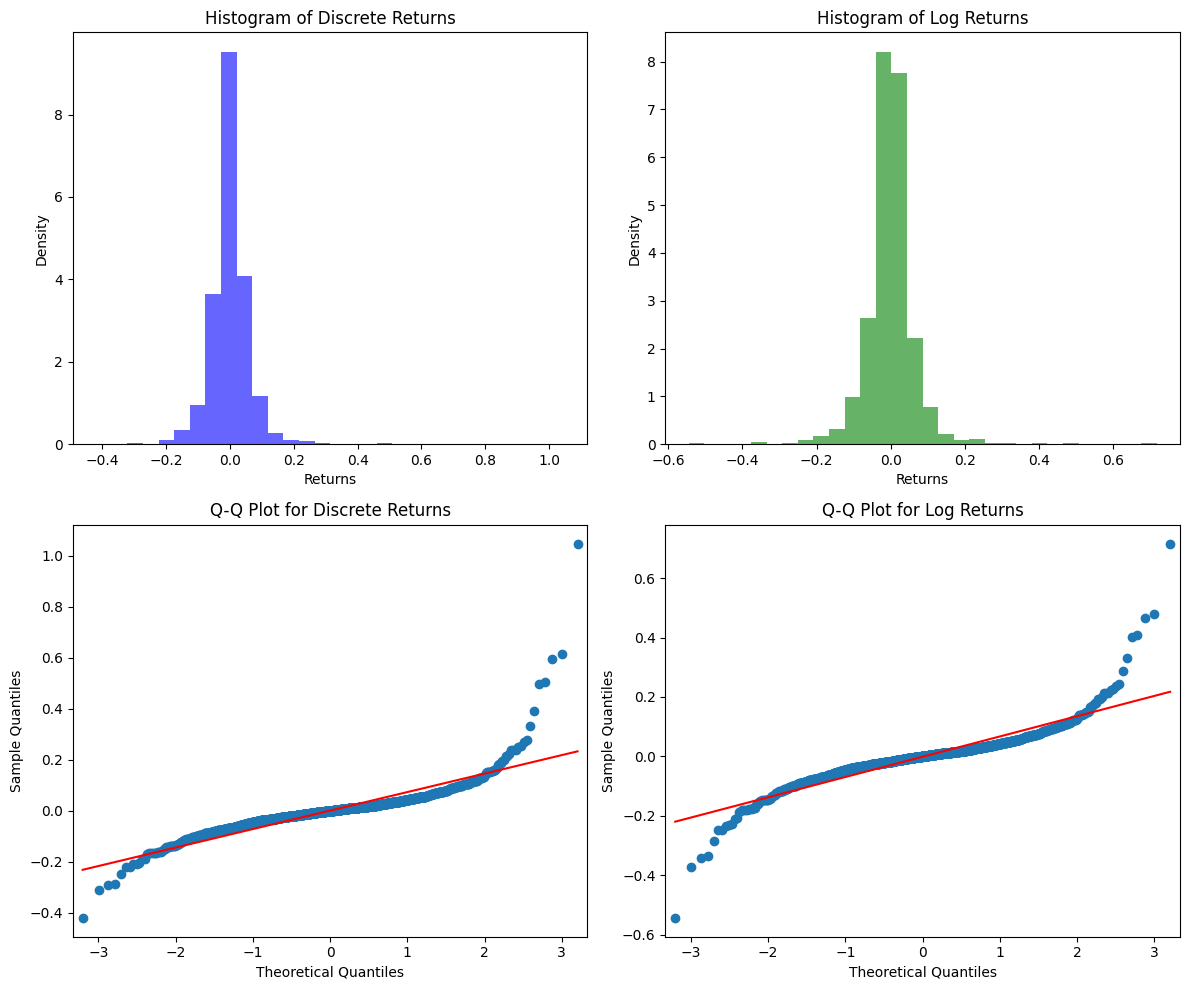

In [7]:
def analyze_returns(df):
    """
    Analyze discrete and log returns for symmetry, normality, and stability.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'discrete_returns' and 'log_returns'.

    Returns:
        None
    """
    # Descriptive statistics
    desc_stats = df[['discrete_returns', 'log_returns']].describe()
    print("Descriptive Statistics:")
    print(desc_stats)

    # Calculate skewness
    skewness_discrete = skew(df['discrete_returns'])
    skewness_log = skew(df['log_returns'])
    print(f"\nSkewness:\nDiscrete Returns: {skewness_discrete}\nLog Returns: {skewness_log}")

    # Shapiro-Wilk test for normality
    shapiro_discrete = shapiro(df['discrete_returns'])
    shapiro_log = shapiro(df['log_returns'])
    print(f"\nShapiro-Wilk Test:\nDiscrete Returns: Statistic={shapiro_discrete.statistic}, p-value={shapiro_discrete.pvalue}")
    print(f"Log Returns: Statistic={shapiro_log.statistic}, p-value={shapiro_log.pvalue}")

    # Plot histograms and density plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Histogram for discrete returns
    axs[0, 0].hist(df['discrete_returns'], bins=30, density=True, alpha=0.6, color='b')
    axs[0, 0].set_title('Histogram of Discrete Returns')
    axs[0, 0].set_xlabel('Returns')
    axs[0, 0].set_ylabel('Density')

    # Histogram for log returns
    axs[0, 1].hist(df['log_returns'], bins=30, density=True, alpha=0.6, color='g')
    axs[0, 1].set_title('Histogram of Log Returns')
    axs[0, 1].set_xlabel('Returns')
    axs[0, 1].set_ylabel('Density')

    # Q-Q plot for discrete returns
    qqplot(df['discrete_returns'], line='s', ax=axs[1, 0])
    axs[1, 0].set_title('Q-Q Plot for Discrete Returns')
    axs[1, 0].set_xlabel('Theoretical Quantiles')
    axs[1, 0].set_ylabel('Sample Quantiles')

    # Q-Q plot for log returns
    qqplot(df['log_returns'], line='s', ax=axs[1, 1])
    axs[1, 1].set_title('Q-Q Plot for Log Returns')
    axs[1, 1].set_xlabel('Theoretical Quantiles')
    axs[1, 1].set_ylabel('Sample Quantiles')

    plt.tight_layout()
    plt.show()

# Example of how to call the function
df = BTG.data
analyze_returns(df)


In [41]:
for crypto in Cryptos:
    print (crypto.name)

BTG
EMC2
ELC
ETC
EXP
XZC
ZEN
KRB
LTC
MNC
PIN
XVG


### Panel data

In [11]:
df = panel_data
panel_data.columns

Index(['close', 'volume', 'marketCap', 'Currency', 'log_returns',
       'discrete_returns', 'market_discrete_returns', 'market_log_returns'],
      dtype='object')

Step 1: Handling missing data
Missing data after handling:
close                      0
volume                     0
marketCap                  0
Currency                   0
log_returns                0
discrete_returns           0
market_discrete_returns    0
market_log_returns         0
return                     0
market_return              0
dtype: int64


Step 2: Summary Statistics:
                Currency    return                                \
                              mean       std       min       max   
0           Bitcoin Gold -0.001400  0.068278 -0.544442  0.716325   
1            Einsteinium -0.003057  0.078954 -0.803931  0.413099   
2            Electroneum -0.001612  0.077860 -0.516794  0.738060   
3       Ethereum Classic -0.000097  0.062762 -0.506383  0.352474   
4                Expanse -0.003602  0.151157 -2.428490  2.467254   
5                   Firo -0.001755  0.067728 -0.501802  0.387342   
6                Horizen  0.000301  0.069644 -0.545630  0.380007

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11980\805535560.py:17: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  panel_data['return'] = panel_data.groupby('Currency')['return'].fillna(method='ffill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11980\805535560.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  panel_data['return'] = panel_data.groupby('Currency')['return'].fillna(method='ffill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11980\805535560.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  panel_data['market_return'] = panel_data['market_return'].fillna(method='ffill')


                          PanelOLS Estimation Summary                           
Dep. Variable:                 return   R-squared:                        0.0017
Estimator:                   PanelOLS   R-squared (Between):              0.0491
No. Observations:               17688   R-squared (Within):               0.0017
Date:                Sun, Oct 13 2024   R-squared (Overall):              0.0018
Time:                        19:49:29   Log-likelihood                 1.892e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      30.858
Entities:                          12   P-value                           0.0000
Avg Obs:                       1474.0   Distribution:                 F(1,17675)
Min Obs:                       1474.0                                           
Max Obs:                       1474.0   F-statistic (robust):             30.858
                            

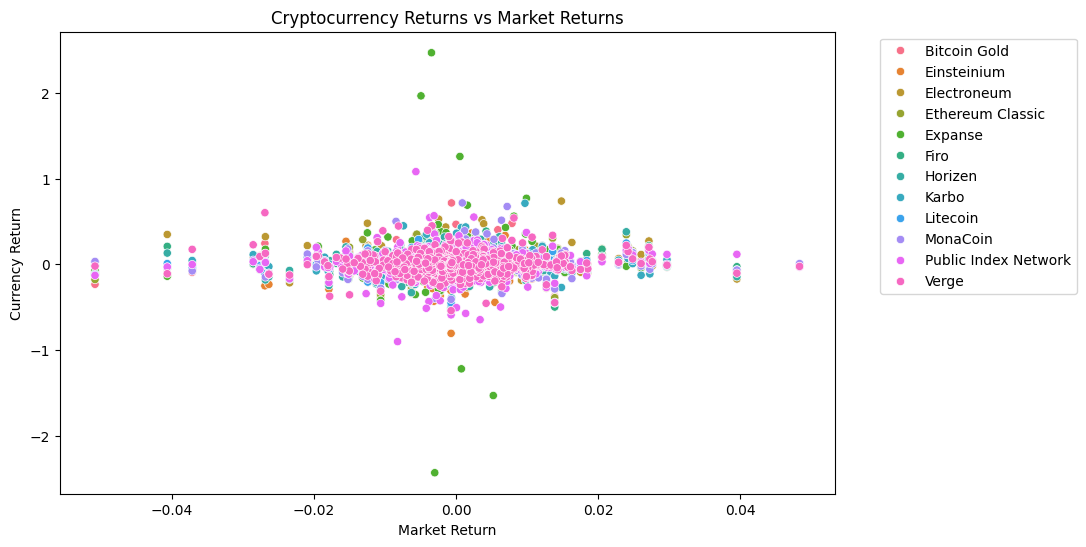

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_panel_data_with_missing(panel_data,return_type='log_returns'):
    # Step 1: Handle Missing Data
    panel_data['return'] = panel_data[return_type]
    panel_data['market_return'] = panel_data['market_'+return_type]
    # Assuming missing data comes from non-existence or disappearance of cryptocurrencies
    # Fill missing 'return' and 'market_return' with NaN where the cryptocurrency didn't exist.
    print("Step 1: Handling missing data")
    
    # Forward fill for cryptocurrencies that ceased to exist, keeping data intact for non-existent ones
    panel_data['return'] = panel_data.groupby('Currency')['return'].fillna(method='ffill')
    panel_data['market_return'] = panel_data['market_return'].fillna(method='ffill')

    # Summarize the missing data
    missing_data_summary = panel_data.isnull().sum()
    print(f"Missing data after handling:\n{missing_data_summary}")
    print("\n" + "="*50 + "\n")

    # Step 2: Summary Statistics
    summary_stats = panel_data.groupby('Currency').agg({
        'return': ['mean', 'std', 'min', 'max'],
        'market_return': ['mean', 'std', 'min', 'max']
    }).reset_index()

    print("Step 2: Summary Statistics:")
    print(summary_stats)
    print("\n" + "="*50 + "\n")

    # Step 3: Pooled OLS Regression
    print("Step 3: Pooled OLS Regression Results:")
    pooled_model = sm.OLS(panel_data['return'], sm.add_constant(panel_data['market_return']), missing='drop')
    pooled_results = pooled_model.fit()
    print(pooled_results.summary())
    print("\n" + "="*50 + "\n")

    # Step 4: Panel Data Preparation
    # Set a multi-index for 'Cryptocurrency' and 'Date' to prepare for panel data models
    panel_data['Date'] = panel_data.index
    panel_data.set_index(['Currency', 'Date'], inplace=True)
    
    # Step 5: Fixed Effects Model
    print("Step 5: Fixed Effects Model Results:")
    fixed_effects_model = PanelOLS.from_formula('return ~ market_return + EntityEffects', data=panel_data)
    fe_results = fixed_effects_model.fit()
    print(fe_results)
    print("\n" + "="*50 + "\n")

    # Step 6: Random Effects Model
    print("Step 6: Random Effects Model Results:")
    random_effects_model = RandomEffects.from_formula('return ~ market_return', data=panel_data)
    re_results = random_effects_model.fit()
    print(re_results)
    print("\n" + "="*50 + "\n")

    # Step 7: Correlation Analysis
    correlation_matrix = panel_data[['return', 'market_return']].corr()
    print("Step 7: Correlation Analysis:")
    print(correlation_matrix)
    print("\n" + "="*50 + "\n")

    # Step 8: Visual Analysis
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=panel_data.reset_index(), x='market_return', y='return', hue='Currency')
    plt.title('Cryptocurrency Returns vs Market Returns')
    plt.xlabel('Market Return')
    plt.ylabel('Currency Return')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

analyze_panel_data_with_missing(panel_data)


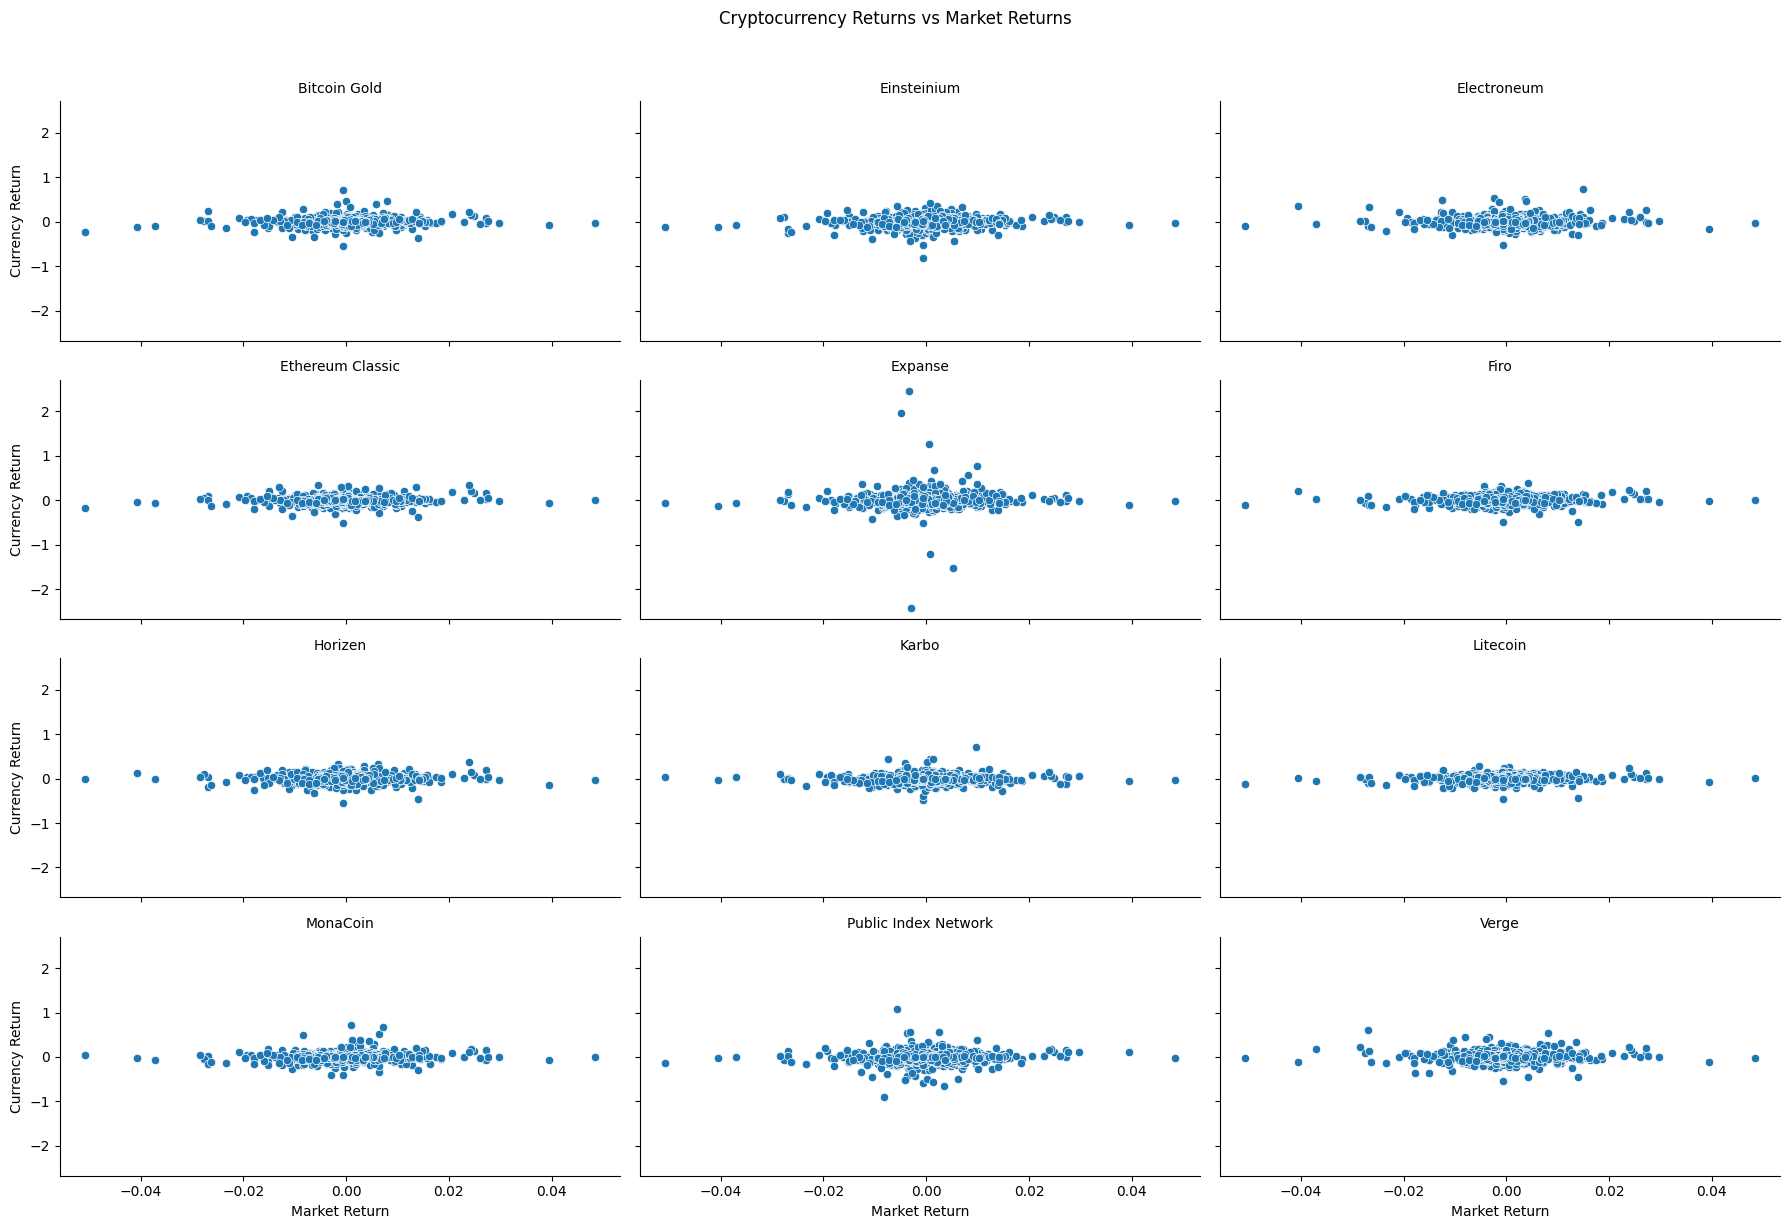

In [40]:
# Step 8: Visual Analysis with Subplots for Each Cryptocurrency
import seaborn as sns
import matplotlib.pyplot as plt
data = panel_data.copy()
# # data['market_return'] = data['market_return']**2
# data['return'] = np.log(data['return'])
# Set up the grid for subplots, with one subplot per cryptocurrency
g = sns.FacetGrid(data.reset_index(), col='Currency', col_wrap=3, height=3, aspect=2)

# Create a scatter plot in each subplot
g.map(sns.scatterplot, 'market_return', 'return')

# Adjust the layout, add titles, and labels
g.set_axis_labels('Market Return', 'Currency Return')
g.set_titles('{col_name}')
g.fig.suptitle('Cryptocurrency Returns vs Market Returns', y=1.02)

# Increase the space between subplots (both horizontal and vertical)
plt.subplots_adjust(hspace=3, wspace=0.5)  # Increase wspace for horizontal space

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import statsmodels.api as sm

def panel_analysis(data):
    """
    Perform a panel analysis to compare log returns and discrete returns.
    
    Parameters:
    - data: DataFrame containing the panel data with necessary return variables.
    - independent_vars: List of strings, names of independent variables.
    
    Returns:
    - results_summary: Dictionary containing results for both log and discrete returns.
    """
    
    # Initialize results dictionary
    results_summary = {}

    # Function to perform regression analysis
    def run_regression(dep_var,independent_vars):
        X = sm.add_constant(data[independent_vars])
        y = data[dep_var]
        model = sm.OLS(y, X)
        results = model.fit()

        return {
            'coefficients': results.params,
            'p-values': results.pvalues,
            'r_squared': results.rsquared,
            'f_statistic': results.fvalue,
            'f_pvalue': results.f_pvalue,
            'summary': results.summary().as_text(),
        }

    # Run regression for log returns
    results_summary['log_returns'] = run_regression('log_returns',['market_log_returns'])

    # Run regression for discrete returns
    results_summary['discrete_returns'] = run_regression('discrete_returns',['market_discrete_returns'])

    return results_summary

panel_analysis(df)


{'log_returns': {'coefficients': const                -0.001414
  market_log_returns    0.548422
  dtype: float64,
  'p-values': const                 2.358065e-02
  market_log_returns    2.796262e-08
  dtype: float64,
  'r_squared': np.float64(0.0017425073283880987),
  'f_statistic': np.float64(30.871778910864574),
  'f_pvalue': np.float64(2.7962616041019725e-08),
  'summary': '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:            log_returns   R-squared:                       0.002\nModel:                            OLS   Adj. R-squared:                  0.002\nMethod:                 Least Squares   F-statistic:                     30.87\nDate:                Sun, 13 Oct 2024   Prob (F-statistic):           2.80e-08\nTime:                        01:49:48   Log-Likelihood:                 18919.\nNo. Observations:               17688   AIC:              

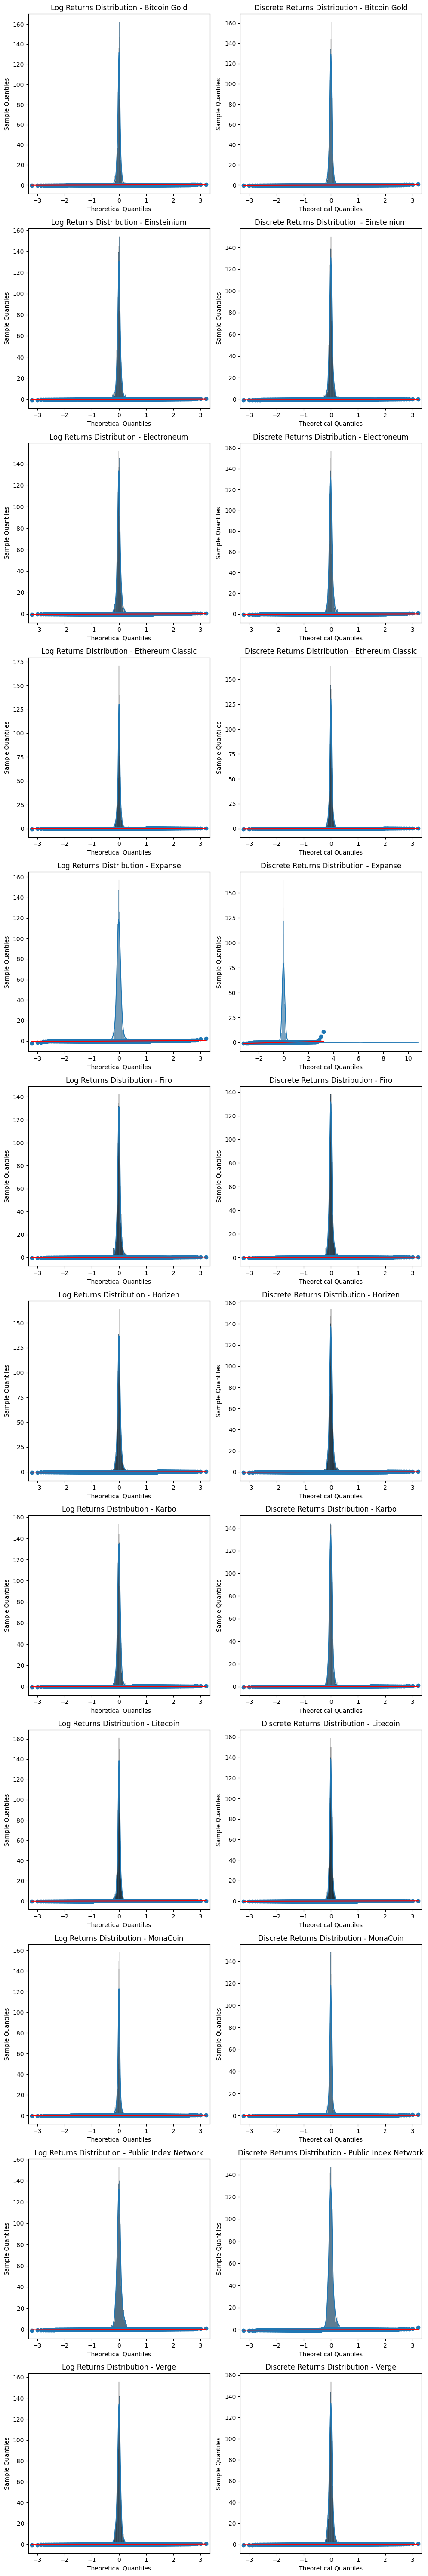

In [24]:
import seaborn as sns
def plot_panel_data(panel_data):
    currencies = panel_data['Currency'].unique()
    fig, axs = plt.subplots(len(currencies), 2, figsize=(10, len(currencies) * 5))
    
    for i, currency in enumerate(currencies):
        data = panel_data[panel_data['Currency'] == currency]
        
        # Distribution plot for log and discrete returns
        sns.histplot(data['log_returns'], kde=True, ax=axs[i, 0])
        axs[i, 0].set_title(f'Log Returns Distribution - {currency}')
        
        sns.histplot(data['discrete_returns'], kde=True, ax=axs[i, 1])
        axs[i, 1].set_title(f'Discrete Returns Distribution - {currency}')
        
        # QQ plot for log returns
        sm.qqplot(data['log_returns'], line='s', ax=axs[i, 0])
        
        # QQ plot for discrete returns
        sm.qqplot(data['discrete_returns'], line='s', ax=axs[i, 1])
        
    plt.tight_layout()
    plt.show()

# Example usage
plot_panel_data(panel_data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16272\2798192498.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_discrete'] = (1 + df[discrete_col].fillna(0)).cumprod() - 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16272\2798192498.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_log'] = np.exp(df[log_col].cumsum()) - 1
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16272\2798192498.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

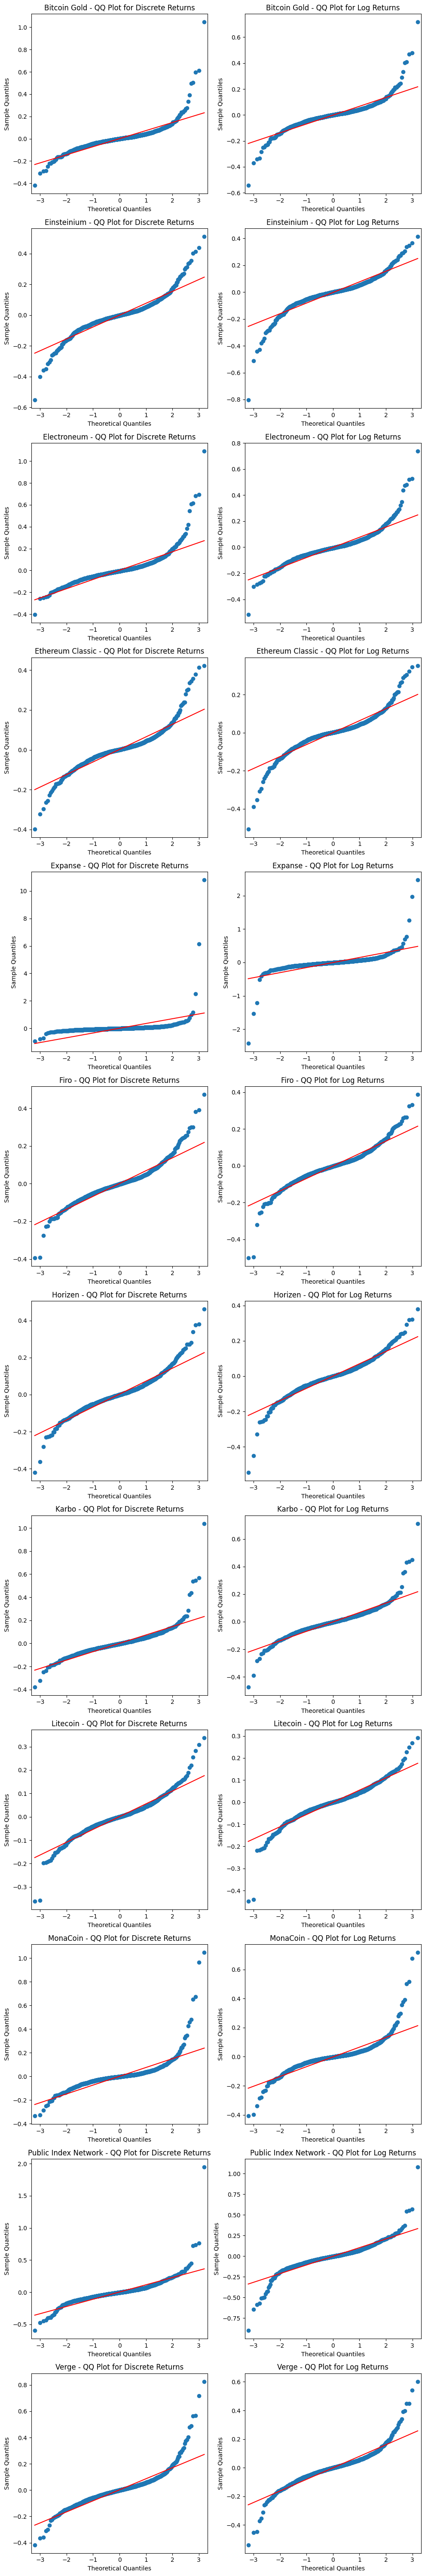

{'summary_stats': [       discrete_returns  log_returns
  count       1474.000000  1474.000000
  mean           0.000997    -0.001400
  std            0.072443     0.068278
  min           -0.419835    -0.544442
  25%           -0.028700    -0.029119
  50%           -0.000009    -0.000009
  75%            0.025621     0.025299
  max            1.046897     0.716325,
         discrete_returns  log_returns
  count       1474.000000  1474.000000
  mean          -0.000010    -0.003057
  std            0.077267     0.078954
  min           -0.552434    -0.803931
  25%           -0.034016    -0.034608
  50%           -0.001235    -0.001236
  75%            0.028784     0.028378
  max            0.511495     0.413099,
         discrete_returns  log_returns
  count       1474.000000  1474.000000
  mean           0.001553    -0.001612
  std            0.084441     0.077860
  min           -0.403571    -0.516794
  25%           -0.038158    -0.038905
  50%           -0.005769    -0.005785
  75% 

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

def panel_analysis(data, dependent_var, independent_vars, return_type='log'):
    """
    Perform a panel analysis to compare log returns and discrete returns.
    
    Parameters:
    - data: DataFrame containing the panel data with time, coin, and return variables.
    - dependent_var: String, the name of the dependent variable (return).
    - independent_vars: List of strings, names of independent variables.
    - return_type: String, either 'log' or 'discrete', indicating which type of return to analyze.
    
    Returns:
    - results_summary: Dictionary with regression coefficients, p-values, R-squared, and other statistics.
    """
    
    # Transform returns if necessary
    if return_type == 'log':
        data[dependent_var] = np.log(data[dependent_var] + 1)  # Adjust for zero returns
    elif return_type == 'discrete':
        pass  # Assume the data is already in discrete form
    else:
        raise ValueError("return_type must be either 'log' or 'discrete'.")

    # Prepare the model
    X = sm.add_constant(data[independent_vars])
    y = data[dependent_var]

    # Fit the model
    model = sm.OLS(y, X)
    results = model.fit()

    # Collect results
    results_summary = {
        'coefficients': results.params,
        'p-values': results.pvalues,
        'r_squared': results.rsquared,
        'f_statistic': results.fvalue,
        'f_pvalue': results.f_pvalue,
        'summary': results.summary(),
    }

    return results_summary

# Example usage
# Assuming 'df' is your DataFrame containing the panel data
# results_log = panel_analysis(df, 'log_returns', ['independent_var1', 'independent_var2'], return_type='log')
# results_discrete = panel_analysis(df, 'discrete_returns', ['independent_var1', 'independent_var2'], return_type='discrete')

  

panel_analysis(panel_data, 'Currency', 'discrete_returns', 'log_returns')


# RESULTS

In [12]:
# imlepmenting the CAR calculation function and getting relevent information in the form of datasets
horizon = 11
All_CAR_dataset=pd.DataFrame() #this dataset contains resuts of CAR for all currencies on the event window
                               #starting from hrizon 0 (the day of the attack) to hoizon 10 (10 days after the atack)
All_crypto_data=pd.DataFrame() #this dataset containsg resuts of AR and other relevent information for all currencies
                               #on the entire selection window (estimation window + event window) starting from 80 days
                               #before the attack (the day of the attack) to hoizon 10 (10 days after the atack)
min_CAR_list=[]
CAR_list=[]
name_list=[]
attack_name_list=[]
price_variation_list=[]
CCMIX_variation_list=[]
attack_dates_list=[]

for crypto in Cryptos:
  name=crypto.value.name
  name_list.append(name)
  for attack_date in crypto.value.attack_dates:
    crypto_attack = CryptoAttack(crypto.value,attack_date)
    crypto_attack.calculate_CAR(horizon=horizon)
    All_crypto_data=pd.concat([All_crypto_data,crypto_attack.data.reset_index()[['returns','market_returns','AR']]],axis=1)
    All_crypto_data.rename(columns={'returns': crypto_attack.attack_name+' return',
                                    'market_returns': crypto_attack.attack_name+' Rmkt',
                                    'AR':crypto_attack.attack_name+' AR'}, 
                                    inplace=True)
    attack_name_list.append(crypto_attack.attack_name)
    attack_dates_list.append(attack_date)
    CAR_list.append(crypto_attack.CAR)
    min_CAR_list.append(crypto_attack.min_CAR)

All_CAR_dataset['Mean CAR']=All_CAR_dataset.mean(axis=1)
Attack_results=pd.DataFrame({
  "Name":attack_name_list,
  "Attack date":attack_dates_list,
  "Min_CAR":min_CAR_list,
  "CAR after "+str(horizon-1)+" days":CAR_list,
  # "Price variation "+str(horizon-1)+" days after the attack (%)" :price_variation_list,
  # "CCMIX variation "+str(horizon-1)+" days after the attack (%)" :CCMIX_variation_list
  })

All_crypto_data.dropna(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27768\1091180748.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.attack_window_data['CAR'] = self.attack_window_data['AR'].cumsum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27768\1091180748.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.attack_window_data['CAR'] = self.attack_window_data['AR'].cumsum()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27768\1091180748.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [15]:
import seaborn as sns

# Apply a Seaborn theme
sns.set(style="whitegrid")

# Defining a plot function for CAR figures
def plot_CAR(crypto_attack):
    plt.figure(figsize=(8, 6))  # Make the figure slightly wider
    CAR_values = crypto_attack.attack_window_data.reset_index()['CAR']
    
    # Plot CAR values with a smoother line and custom color
    plt.plot(np.exp(CAR_values)-1, label='CAR', color='teal', lw=2)
    
    # Rotate x-ticks for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add vertical and horizontal lines
    plt.axvline(x=0, color='red', linestyle='--', lw=1.5)
    plt.axhline(y=0, color='black', linestyle='--', lw=1.5)
    
    # Set the title and labels
    plt.title(f"Cumulative Abnormal Return for {crypto_attack.attack_name}", fontsize=14, fontweight='bold')
    plt.xlabel('Horizon', fontsize=12)
    plt.ylabel('Cumulative Return', fontsize=12)
    
    # Customize legend
    plt.legend(loc='upper left', fontsize=10, frameon=True)
    
    # Make the layout tight and readable
    plt.tight_layout()
    plt.show()

def plot_cumulative_returns(crypto_attack):
    plt.figure(figsize=(8, 6))  # Slightly wider figure
    CR_values = crypto_attack.data.reset_index()['returns'].cumsum()
    CR_values.index = CR_values.index - len(crypto_attack.estimation_window_data)
    
    # Plot cumulative returns with a smoother line
    plt.plot(np.exp(CR_values)-1, label='Cumulative Return', color='blue', lw=2)
    
    # Rotate x-ticks for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add vertical and horizontal lines
    plt.axvline(x=0, color='red', linestyle='--', lw=1.5)
    plt.axhline(y=0, color='black', linestyle='--', lw=1.5)
    
    # Set the title and labels
    plt.title(f"Cumulative Returns for {crypto_attack.attack_name}", fontsize=14, fontweight='bold')
    plt.xlabel('Horizon', fontsize=12)
    plt.ylabel('Cumulative Return', fontsize=12)
    
    # Customize legend
    plt.legend(loc='upper left', fontsize=10, frameon=True)
    
    # Make the layout tight and readable
    plt.tight_layout()
    plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27768\1091180748.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.attack_window_data['CAR'] = self.attack_window_data['AR'].cumsum()


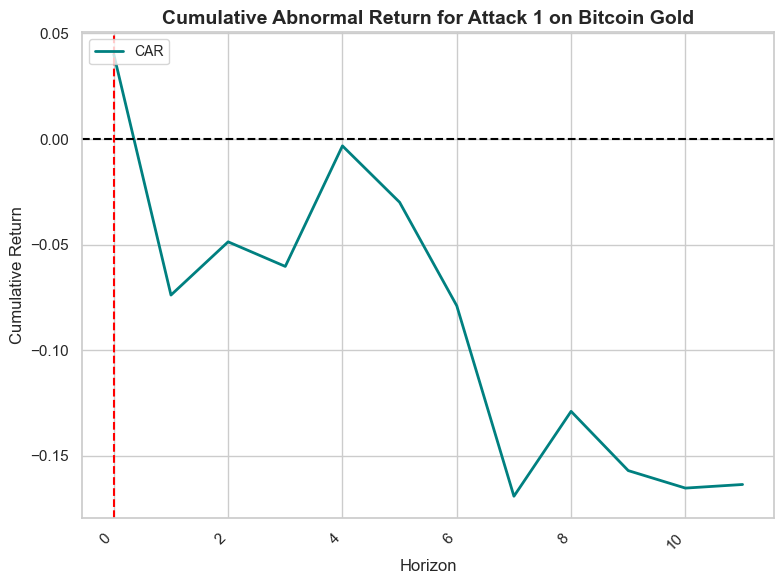

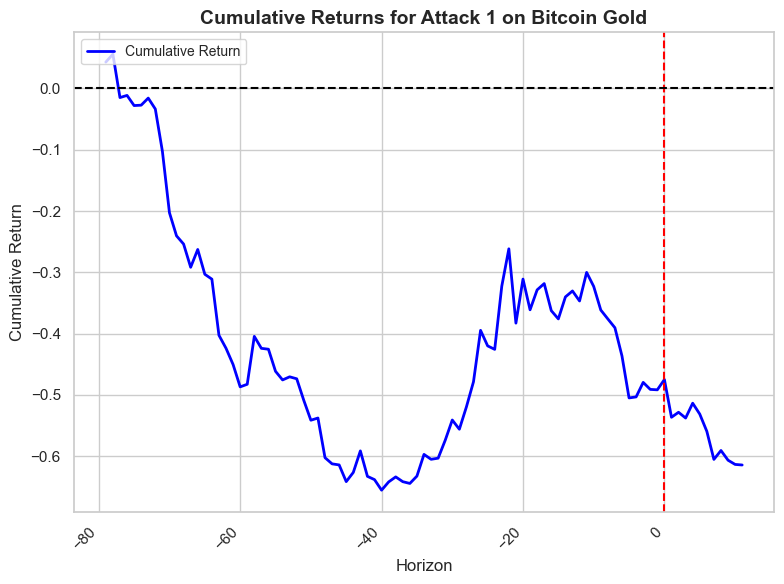

In [16]:
crypto_attack = CryptoAttack(BTG,BTG.attack_dates[0])
crypto_attack.calculate_CAR()
plot_CAR(crypto_attack)
plot_cumulative_returns(crypto_attack)

# Tests

In [113]:
Mi=80 #size of the event window
N=19 #number of attacks

In [114]:
All_crypto_data['AAR']=All_crypto_data[[attack_name+' AR' for attack_name in attack_name_list]].mean(axis=1)

In [115]:
All_crypto_data['S_AAR']=(((All_crypto_data[[attack_name+' AR' for attack_name in attack_name_list]]-All_crypto_data['AAR'])**2).sum(axis=1)/(N-1)).apply(np.sqrt)

In [116]:
for attack_name in attack_name_list :
  AR=attack_name+' AR'
  Rmkt=attack_name+' Rmkt'
  Rmkt_=All_crypto_data[Rmkt].mean()
  S_ARi=np.sqrt((All_crypto_data.loc[:Mi-1,AR]**2).sum()/(Mi-2))
  All_crypto_data[attack_name+' adj_S_AR']=(S_ARi**2*(1+1/Mi+((All_crypto_data[Rmkt]-Rmkt_)**2)/(((All_crypto_data.loc[:Mi-1,Rmkt]-Rmkt_)**2).sum()))).apply(np.sqrt)
  All_crypto_data[attack_name+' S_AR']=S_ARi
  All_crypto_data[attack_name+' adj_S_CAR']=np.sqrt(S_ARi**2*((All_crypto_data.index-80)*(1+1/Mi)+((All_crypto_data.loc[Mi:,Rmkt]-Rmkt_)**2).sum()/(((All_crypto_data.loc[:Mi-1,Rmkt]-Rmkt_)**2).sum())))
  All_crypto_data[attack_name+' SAR']=All_crypto_data[attack_name+' AR']/All_crypto_data[attack_name+' S_AR']

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid val

In [117]:
All_crypto_data['ASAR']=All_crypto_data[[attack_name+' SAR' for attack_name in attack_name_list]].sum(axis=1)

In [118]:
All_crypto_data['S_ASAR']=((All_crypto_data[[attack_name+' SAR' for attack_name in attack_name_list]].sub(All_crypto_data[[attack_name+' SAR' for attack_name in attack_name_list]].mean(axis=1),axis=0)**2).sum(axis=1)/(N-1)).apply(np.sqrt)

In [119]:
All_crypto_data['S_SAR']=All_crypto_data['S_ASAR']

In [120]:
Event_Window_data=All_crypto_data.iloc[80:,:]

In [121]:
for attack_name in attack_name_list :
  AR=attack_name+' AR'
  adj_S_CAR=attack_name+' adj_S_CAR'
  S_CAR=attack_name+' S_CAR'
  CAR=attack_name+' CAR'
  S_AR=attack_name+' S_AR'
  SCAR=attack_name+' SCAR'
  Event_Window_data[CAR]=Event_Window_data[AR].cumsum()
  Event_Window_data[S_CAR]=Event_Window_data[S_AR]*np.sqrt(Event_Window_data.index-Mi+1)
  Event_Window_data[SCAR]=Event_Window_data[CAR]/Event_Window_data[adj_S_CAR]

<ipython-input-121-3d10027967bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data[CAR]=Event_Window_data[AR].cumsum()
<ipython-input-121-3d10027967bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data[S_CAR]=Event_Window_data[S_AR]*np.sqrt(Event_Window_data.index-Mi+1)
<ipython-input-121-3d10027967bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [122]:
Event_Window_data['S_SCAR']=((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]]-Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean())**2/(N-1)).sum(axis=1).apply(np.sqrt)

<ipython-input-122-218ff3694ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['S_SCAR']=((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]]-Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean())**2/(N-1)).sum(axis=1).apply(np.sqrt)


In [123]:
Event_Window_data['SCAR_']=Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean(axis=1)

<ipython-input-123-391aa2976dc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['SCAR_']=Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean(axis=1)


In [124]:
Event_Window_data['S_SCAR_']=(((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].sub(Event_Window_data['SCAR_'],axis=0))**2).sum(axis=1)/(N-1)).apply(np.sqrt)

<ipython-input-124-b7b33be4896d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['S_SCAR_']=(((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].sub(Event_Window_data['SCAR_'],axis=0))**2).sum(axis=1)/(N-1)).apply(np.sqrt)


In [125]:
Event_Window_data['BMP_test']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']

<ipython-input-125-a274103a2389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['BMP_test']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']


In [126]:
Event_Window_data['ASAR']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']

<ipython-input-126-a5d51feb0930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['ASAR']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']


In [127]:
Event_Window_data.at[80,'BMP_test']=Event_Window_data.at[80,'ASAR']/Event_Window_data.at[80,'S_ASAR']/np.sqrt(N)

In [128]:
from scipy.stats import norm
Event_Window_data['p_BMP_test'] = (1 - norm.cdf(abs(Event_Window_data['BMP_test']))) * 2

<ipython-input-128-02ba2cb70df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['p_BMP_test'] = (1 - norm.cdf(abs(Event_Window_data['BMP_test']))) * 2


In [129]:
Event_Window_data['ACAR']=Event_Window_data[[attack_name+' CAR' for attack_name in attack_name_list]].mean(axis=1)

<ipython-input-129-c400b0b71051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['ACAR']=Event_Window_data[[attack_name+' CAR' for attack_name in attack_name_list]].mean(axis=1)


In [130]:
Event_Window_data.columns[Event_Window_data.isna().any()]

Index([], dtype='object')

In [131]:
for h in Event_Window_data.index:
  U_h_=pd.Series([0]*(Mi+1))
  for attack_name in attack_name_list :
    CAR_element=Event_Window_data.at[h,attack_name+' SCAR']/Event_Window_data.at[h,'S_SCAR']
    CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
    CAR_ranks =CAR_series.rank()
    U_it=CAR_ranks/(Mi+2)-0.5
    U_h_=U_h_+U_it
    U_h_=U_h_/N
  print(U_h_.isna().sum())
  S_U_=np.sqrt((U_h_**2).mean())
  Z_h=U_h_[80]/S_U_
  Event_Window_data.at[h,'Grank_test']=Z_h*(Mi-1)/(Mi-Z_h**2)

<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_

0
0
0
0


<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_

0
0
0
0


<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_

0
0
0


<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))


In [132]:
U_0_=pd.Series([0]*(Mi+1))
for attack_name in attack_name_list :
  AR_element=Event_Window_data.at[80,attack_name+' SAR']/Event_Window_data.at[80,'S_SAR']
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
  AR_ranks =CAR_series.rank()
  U_it=AR_ranks/(Mi+2)-0.5
  U_0_=U_0_+U_it
  U_0_=U_0_/N
print(U_0_.isna().sum())
S_U_=np.sqrt((U_0_**2).mean())
Z_0=U_0_[80]/S_U_
Event_Window_data.at[0,'Grank_test']=Z_0*(Mi-1)/(Mi-Z_0**2)

<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_cryp

0


<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data.at[0,'Grank_test']=Z_0*(Mi-1)/(Mi-Z_0**2)


In [133]:
from scipy.stats import t
Event_Window_data['p_Grank_test'] = (1 - t.cdf(abs(Event_Window_data['Grank_test']),Mi-1)) * 2

In [134]:
Event_Window_data['p_Grank_test']

80    0.098313
81    0.305625
82    0.121204
83    0.156233
84    0.122914
85    0.102239
86    0.122820
87    0.133523
88    0.170219
89    0.157631
90    0.327366
0     0.287345
Name: p_Grank_test, dtype: float64

In [135]:
p=proportions_positifs=(All_crypto_data.loc[:79,[attack_name+' AR' for attack_name in attack_name_list]] > 0).mean().mean()
for h in Event_Window_data.index :
  CAR_ih_positifs = (Event_Window_data.loc[h,[attack_name+' CAR' for attack_name in attack_name_list]] > 0).sum()
  Event_Window_data.at[h,'GSign_test']=CAR_ih_positifs-N*p/np.sqrt(N*p*(1-p))

AR_i0_positifs = (Event_Window_data.loc[80,[attack_name+' AR' for attack_name in attack_name_list]] > 0).sum()
Event_Window_data.at[80,'GSign_test']=AR_i0_positifs-N*p/np.sqrt(N*p*(1-p))

In [136]:
Event_Window_data['p_GSign_test'] = (1 - norm.cdf(abs(Event_Window_data['GSign_test']))) * 2

In [137]:
Event_Window_data['p_GSign_test']

80    0.000170
81    0.000002
82    0.000002
83    0.000002
84    0.005781
85    0.005781
86    0.000170
87    0.005781
88    0.005781
89    0.005781
90    0.078420
0     0.000022
Name: p_GSign_test, dtype: float64

In [138]:
final_result_data=Event_Window_data.loc[:,['ACAR','p_BMP_test','p_Grank_test','p_GSign_test']].drop(0)
#final_result_data['ACAR']=np.exp(final_result_data['ACAR'])-1

In [139]:
final_result_data

,ACAR,p_BMP_test,p_Grank_test,p_GSign_test
80,-0.022792,0.606458,0.098313,0.000170
81,-0.025345,0.155926,0.305625,0.000002
82,-0.010856,0.414862,0.121204,0.000002
83,-0.004486,0.567825,0.156233,0.000002
84,-0.011683,0.252984,0.122914,0.005781
85,-0.030034,0.146587,0.102239,0.005781
86,-0.040182,0.137903,0.122820,0.000170
87,-0.029783,0.162191,0.133523,0.005781
88,-0.048770,0.108988,0.170219,0.005781
89,-0.031345,0.176196,0.157631,0.005781


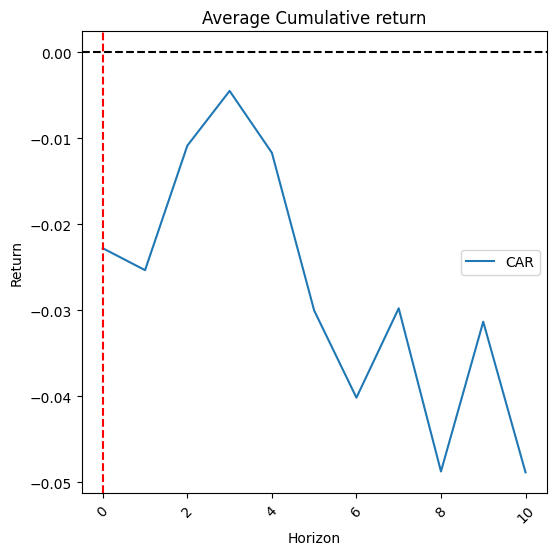

In [140]:
plt.figure(figsize=(6,6))
CAR_dataset=final_result_data['ACAR']
CAR_dataset.index=CAR_dataset.index-80
plt.plot(CAR_dataset,label='CAR')
plt.xticks(rotation=45)
plt.axvline(x=0, color='red', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Average Cumulative return")
plt.xlabel('Horizon')
plt.ylabel('Return')
plt.legend()

# Tests on individual cryptos

In [141]:
for h in Event_Window_data.index:
  for attack_name in attack_name_list :
    test=Event_Window_data.at[h,attack_name+' t_test']=Event_Window_data.at[h,attack_name+' CAR']/Event_Window_data.at[h,attack_name+' S_CAR']
    Event_Window_data.at[h,attack_name+' p_t_test']=(1-t.cdf(abs(test),Mi-2)) *2

In [142]:
["table of the cumulative abnormal return for "+attack_name+ " and the p value of its significance t-test" for attack_name in attack_name_list]

['table of the cumulative abnormal return for Attack 1 on Bitoin Gold and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 2 on Bitoin Gold and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on Einshteinium and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on Electroneum and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 2 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 3 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 4 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on E

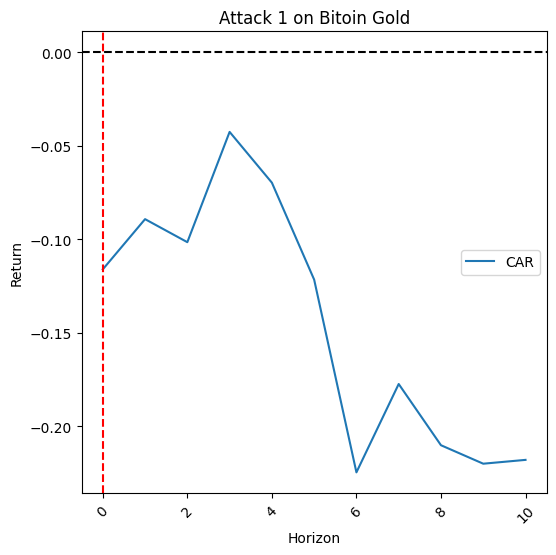

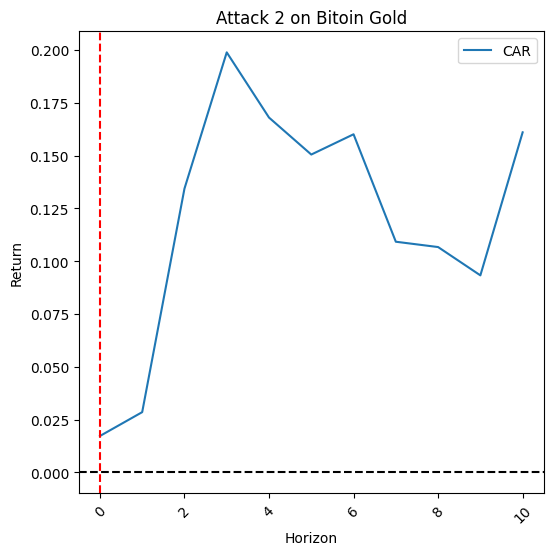

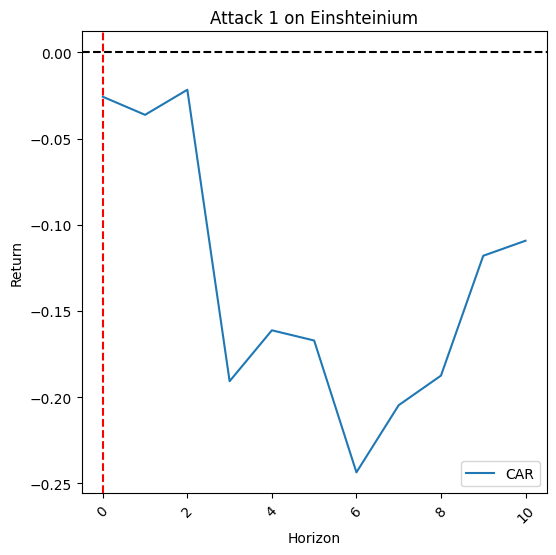

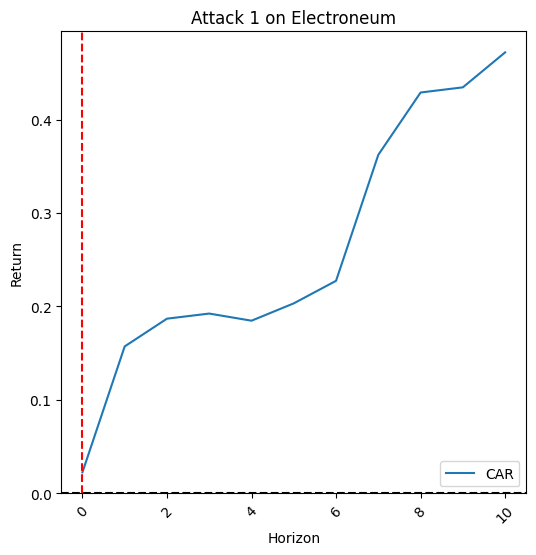

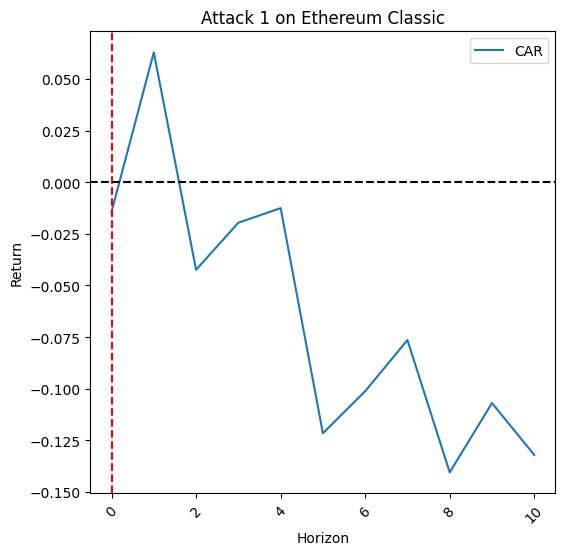

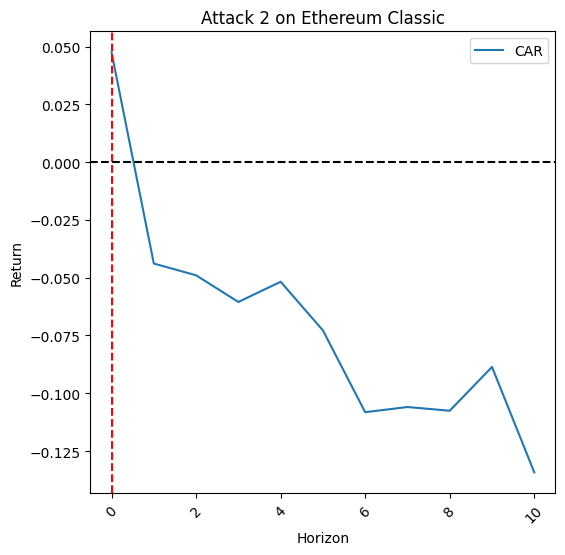

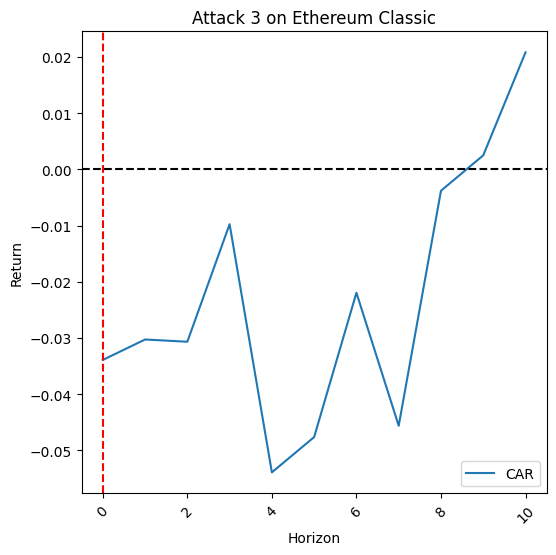

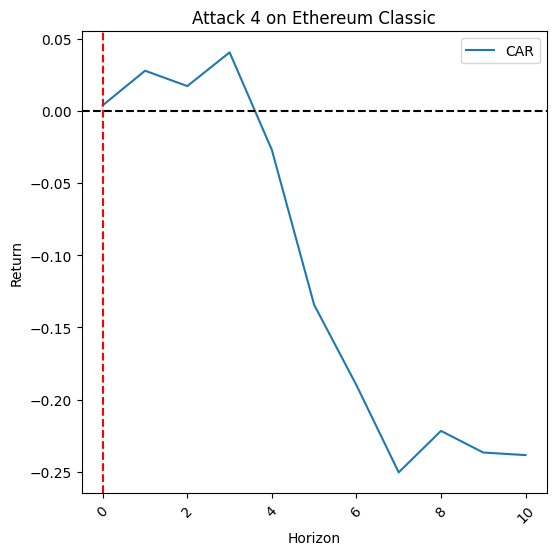

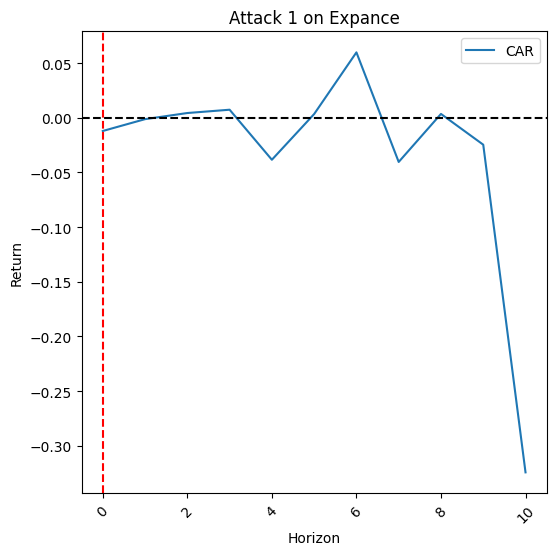

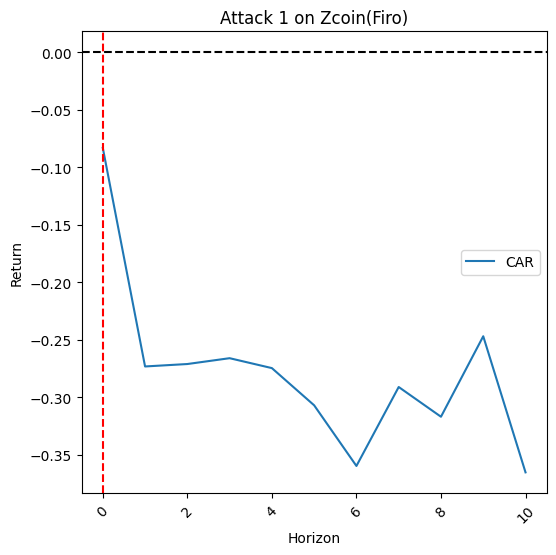

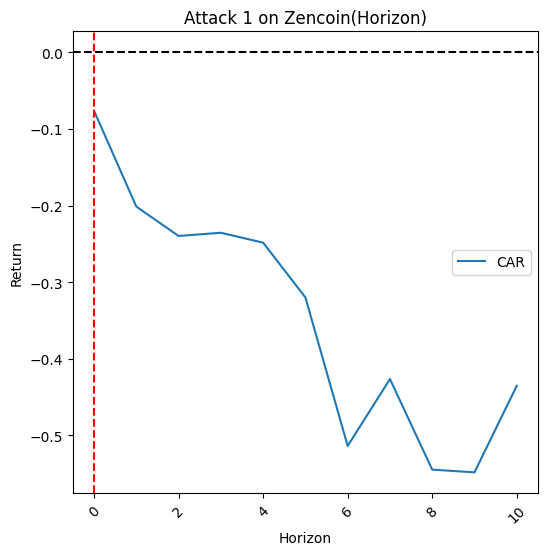

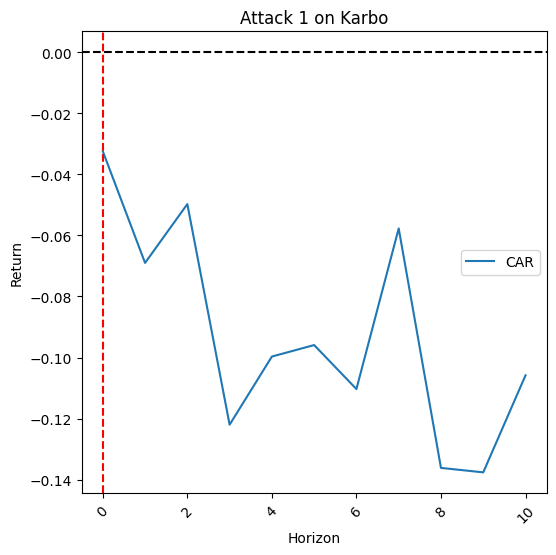

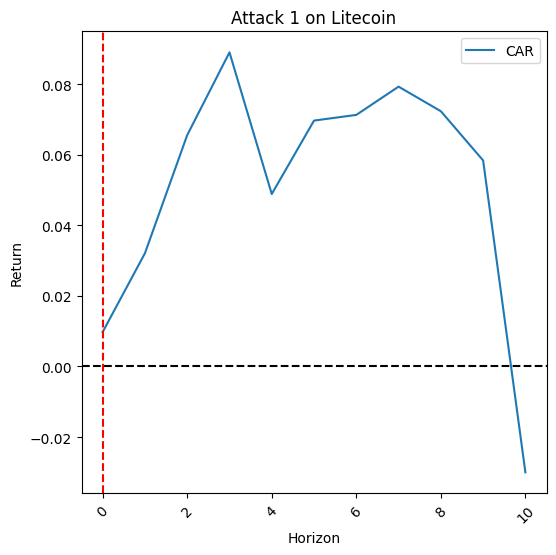

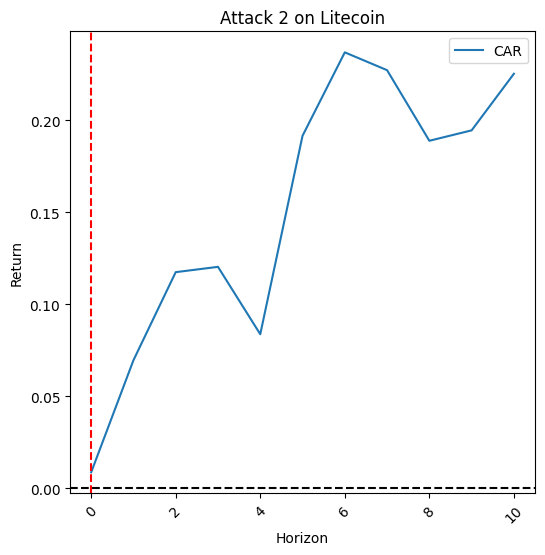

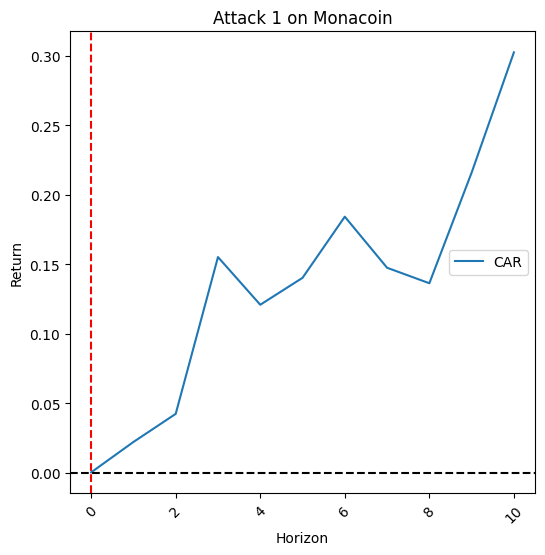

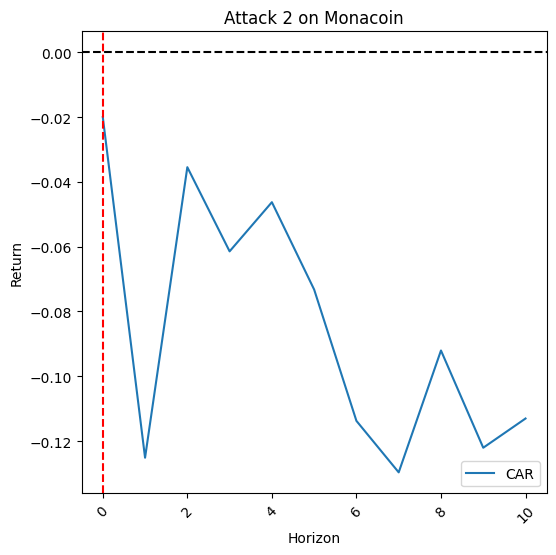

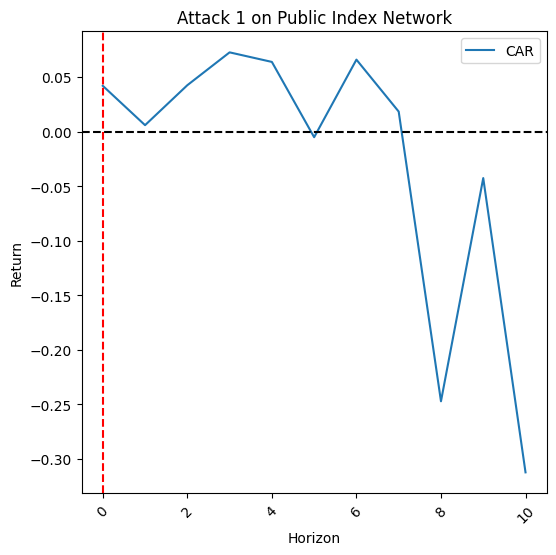

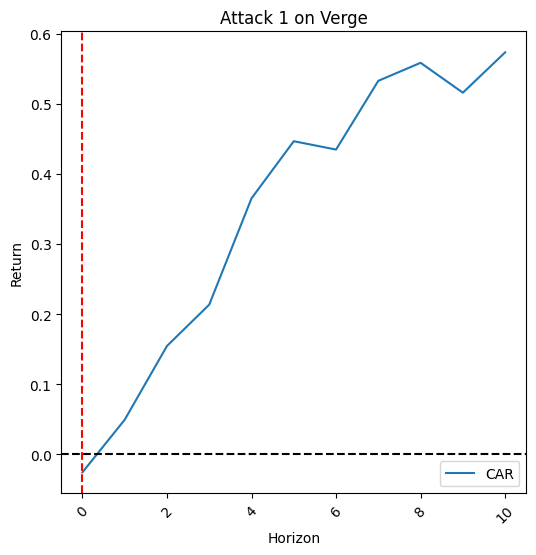

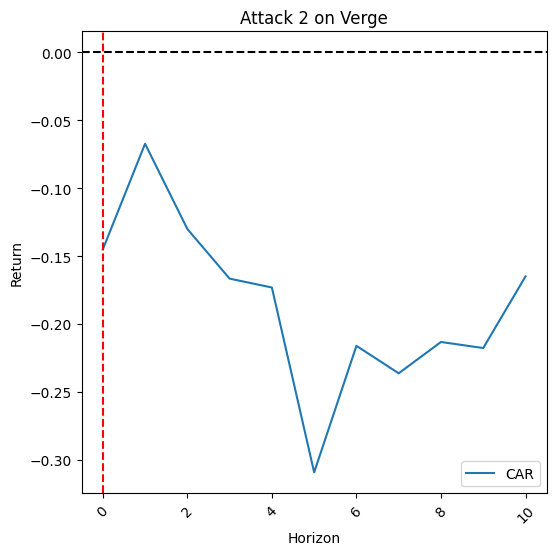

In [143]:
for attack_name in attack_name_list :
  dat=Event_Window_data[attack_name+' CAR'].drop(0)
#  dat=np.exp(dat)-1
  dat.index=dat.index-80
  plt.figure(figsize=(6,6))
  plt.plot(dat,label='CAR')
  plt.xticks(rotation=45)
  plt.axvline(x=0, color ='red', linestyle='--')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.title(attack_name)
  plt.xlabel('Horizon')
  plt.ylabel('Return')
  plt.legend()

In [144]:
for attack_name in attack_name_list :
  dat=Event_Window_data[[attack_name+' CAR',attack_name+' p_t_test']].drop(0)
  dat[attack_name+' CAR']=np.exp(dat[attack_name+' CAR'])-1
  print(dat)

    Attack 1 on Bitoin Gold CAR  Attack 1 on Bitoin Gold p_t_test
80                    -0.109558                          0.083639
81                    -0.085325                          0.343846
82                    -0.096520                          0.378878
83                    -0.041640                          0.748952
84                    -0.067311                          0.639225
85                    -0.114434                          0.455957
86                    -0.201154                          0.203665
87                    -0.162506                          0.346626
88                    -0.189482                          0.293530
89                    -0.197447                          0.296763
90                    -0.195803                          0.324153
    Attack 2 on Bitoin Gold CAR  Attack 2 on Bitoin Gold p_t_test
80                     0.017363                          0.850656
81                     0.028921                          0.825487
82        

In [145]:
Event_Window_data[[attack_name+' p_t_test' for attack_name in attack_name_list]+[attack_name+' CAR' for attack_name in attack_name_list]].drop(0)

,Attack 1 on Bitoin Gold p_t_test,Attack 2 on Bitoin Gold p_t_test,Attack 1 on Einshteinium p_t_test,Attack 1 on Electroneum p_t_test,Attack 1 on Ethereum Classic p_t_test,Attack 2 on Ethereum Classic p_t_test,Attack 3 on Ethereum Classic p_t_test,Attack 4 on Ethereum Classic p_t_test,Attack 1 on Expance p_t_test,Attack 1 on Zcoin(Firo) p_t_test,...,Attack 1 on Zcoin(Firo) CAR,Attack 1 on Zencoin(Horizon) CAR,Attack 1 on Karbo CAR,Attack 1 on Litecoin CAR,Attack 2 on Litecoin CAR,Attack 1 on Monacoin CAR,Attack 2 on Monacoin CAR,Attack 1 on Public Index Network CAR,Attack 1 on Verge CAR,Attack 2 on Verge CAR
80,0.083639,0.850656,0.686886,0.833770,0.812909,0.105806,0.275343,0.899860,0.874550,0.274023,...,-0.083109,-0.076335,-0.032392,0.009764,0.008761,0.000285,-0.019989,0.041876,-0.025565,-0.145147
81,0.343846,0.825487,0.688346,0.296477,0.463229,0.288692,0.490009,0.522336,0.991075,0.012344,...,-0.273318,-0.201393,-0.068993,0.032088,0.069638,0.022149,-0.125150,0.005823,0.049434,-0.067282
82,0.378878,0.397303,0.844528,0.310628,0.685758,0.333444,0.567818,0.746980,0.973418,0.041244,...,-0.271200,-0.239787,-0.049719,0.065563,0.117499,0.042375,-0.035453,0.042434,0.154584,-0.130029
83,0.748952,0.278578,0.138010,0.365790,0.871077,0.300859,0.874728,0.509584,0.961154,0.081696,...,-0.266123,-0.235591,-0.122012,0.089006,0.120387,0.155190,-0.061438,0.072524,0.213577,-0.166587
84,0.639225,0.412208,0.260724,0.436990,0.926003,0.427966,0.437167,0.692533,0.821960,0.107418,...,-0.274751,-0.248525,-0.099679,0.048866,0.083791,0.120869,-0.046259,0.063763,0.365055,-0.173118
85,0.455957,0.502217,0.286942,0.434853,0.412868,0.309396,0.530608,0.076422,0.985171,0.100545,...,-0.307120,-0.320043,-0.095916,0.069676,0.191561,0.140238,-0.073238,-0.005220,0.446545,-0.309221
86,0.203665,0.508694,0.151941,0.418647,0.527600,0.163052,0.788737,0.021282,0.766482,0.075242,...,-0.359900,-0.513995,-0.110330,0.071285,0.236879,0.184237,-0.113776,0.065864,0.434648,-0.216072
87,0.346626,0.672971,0.259043,0.229178,0.655203,0.200898,0.602802,0.004880,0.851461,0.176292,...,-0.291196,-0.426607,-0.057698,0.079293,0.227202,0.147493,-0.129674,0.018251,0.532678,-0.236283
88,0.293530,0.697445,0.329096,0.179963,0.439607,0.220664,0.967238,0.017916,0.987497,0.165208,...,-0.317070,-0.544892,-0.136169,0.072328,0.188860,0.136337,-0.092049,-0.247134,0.558333,-0.213232
89,0.296763,0.747038,0.559381,0.197377,0.576419,0.337560,0.979791,0.016546,0.918806,0.303653,...,-0.247035,-0.548491,-0.137630,0.058382,0.194512,0.215917,-0.122072,-0.042670,0.515721,-0.217689
